**Machine Learning Lab (PMCA507P)**

> **Reg No:** 23MCA1030

>**Name :**  Vinayak Kumar Singh

**Exercise 9:  Ensemble classifiers**

**Collab url :** https://colab.research.google.com/drive/1pstRfqqvQFQfpBSjQ3MLnVt3xihmJ_pP?usp=sharing

**Dataset url :** https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding/code?datasetId=1902&searchQuery=ens

Indian Startup Funding Dataset

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import normalize
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/startup_funding.csv")
df = df.drop(['Sr No','Remarks','SubVertical'],axis = 1)
df = df.dropna()
df = df.reset_index(drop=True)


In [ ]:
count = df['Industry Vertical'].value_counts()
count.head(10)

Consumer Internet    582
Technology           309
eCommerce            126
Finance               53
Healthcare            43
ECommerce             37
E-Commerce            24
Logistics             23
Education             18
Food & Beverage       15
Name: Industry Vertical, dtype: int64

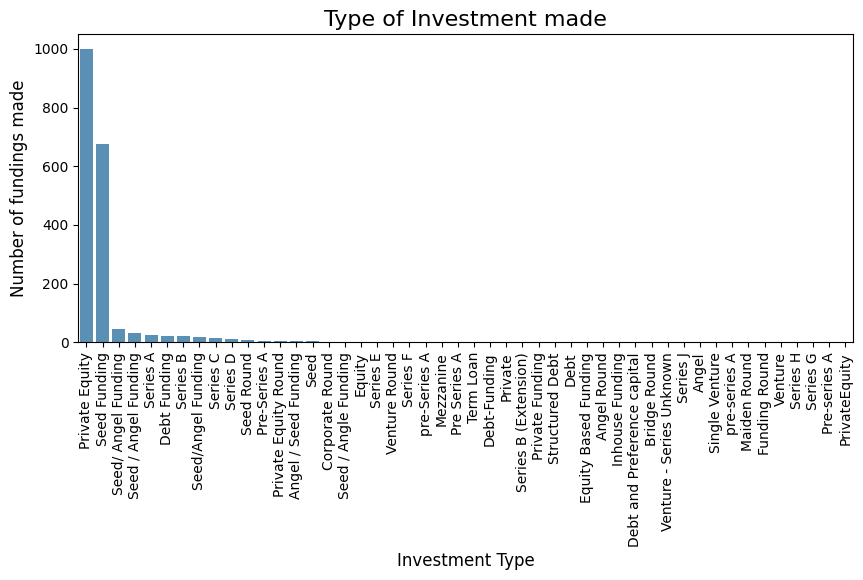

In [ ]:
count = df['InvestmentnType'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x = count.index, y = count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

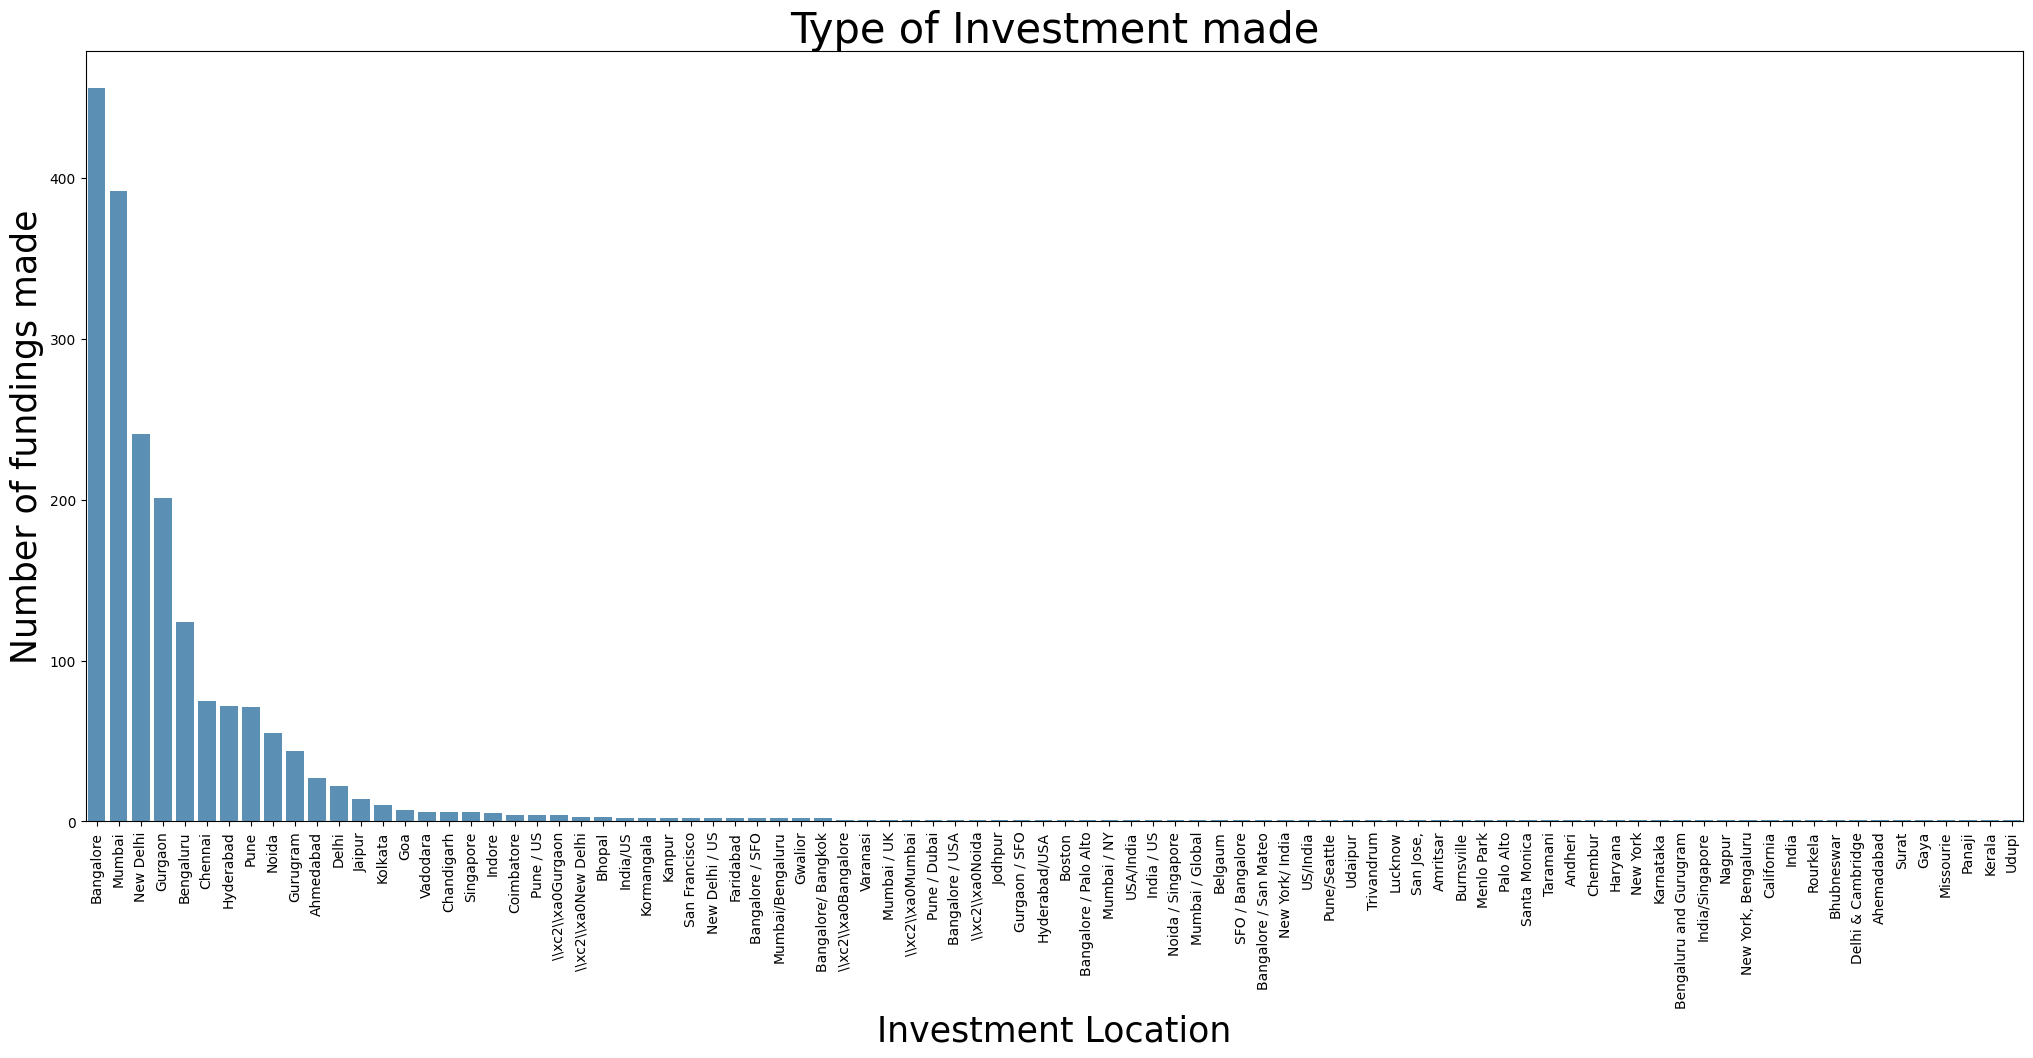

In [ ]:
count = df['City  Location'].value_counts()
plt.figure(figsize=(25,10))
sns.barplot(x = count.index, y = count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Location', fontsize=25)
plt.ylabel('Number of fundings made', fontsize=25)
plt.title("Type of Investment made", fontsize=30)
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df.head()


,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [ ]:
df = df[~df['Amount in USD'].isnull()]


In [ ]:
train,test= train_test_split(df,test_size=0.2,random_state =10)
train_x = train.drop(['Amount in USD'],axis = 1)
train_y = train['Amount in USD']
test_x = test.drop(['Amount in USD'],axis = 1)
test_y = test['Amount in USD']
print(train_y)


3        3000000.0
18       1500000.0
13       2000000.0
2       18358860.0
14      50000000.0
8       70000000.0
17        486000.0
16     150000000.0
237      4200000.0
12      30000000.0
11      12000000.0
1        8048394.0
0      200000000.0
15     231000000.0
4        1800000.0
9       50000000.0
Name: Amount in USD, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1, le2, le3, le4, le5, le6 = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
le1.fit(df['InvestmentnType'])
le2.fit(df['Investors Name'])
le3.fit(df['Industry Vertical'].values)
le4.fit(df['Startup Name'].values)
le5.fit(df['City  Location'].values)
le6.fit(df['Date dd/mm/yyyy'].values)

LabelEncoder()

In [ ]:
train_df = pd.DataFrame(
    {
        'InvestmentType': le1.transform(train_x['InvestmentnType']),
        'InvestorsName': le2.transform(train_x['Investors Name']),
        'IndustryVertical': le3.transform(train_x['Industry Vertical']),
        'StartupName': le4.transform(train_x['Startup Name']),
        'CityLocation': le5.transform(train_x['City  Location']),
        'month': le6.transform(train_x['Date dd/mm/yyyy'])
    })
test_df = pd.DataFrame(
    {
        'InvestmentType': le1.transform(test_x['InvestmentnType']),
        'InvestorsName': le2.transform(test_x['Investors Name']),
        'IndustryVertical': le3.transform(test_x['Industry Vertical']),
        'StartupName': le4.transform(test_x['Startup Name']),
        'CityLocation': le5.transform(test_x['City  Location']),
        'month': le6.transform(test_x['Date dd/mm/yyyy'])
    })

In [ ]:
test_df.head()

,InvestmentType,InvestorsName,IndustryVertical,StartupName,CityLocation,month
0,5,10,14,3,7,6
1,10,9,14,13,3,9
2,5,1,12,11,1,7
3,2,0,11,17,3,4


In [ ]:
clf = GradientBoostingRegressor(learning_rate =0.1,max_depth = 11,min_samples_split =100,min_samples_leaf =20,n_estimators =40,
                               max_features =3,random_state =43)
clf.fit(train_df,train_y)


GradientBoostingRegressor(max_depth=11, max_features=3, min_samples_leaf=20,
                          min_samples_split=100, n_estimators=40,
                          random_state=43)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(train_df, train_y)

RandomForestClassifier()

In [ ]:
evaluate(rf_clf, train_df, train_y, test_df, test_y)

Train Results:
Mean Squared Error: 0.0
R2 Score: 1.0
Mean Absolute Error: 0.0

Test Results:
Mean Squared Error: 2960370221494809.0
R2 Score: 0.18112954819222815
Mean Absolute Error: 39287901.5
Train Results:
Mean Squared Error: 0.0
R2 Score: 1.0
Mean Absolute Error: 0.0

Test Results:
Mean Squared Error: 2960370221494809.0
R2 Score: 0.18112954819222815
Mean Absolute Error: 39287901.5


#Voting Regressor ensemble


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [ ]:
voting_reg = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gb', gb)])

In [ ]:
voting_reg.fit(train_df, train_y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor())])

In [ ]:
evaluate(voting_reg, train_df, train_y, test_df, test_y)

Train Results:
Mean Squared Error: 620569682990373.2
R2 Score: 0.8817093389093895
Mean Absolute Error: 17939311.084098116

Test Results:
Mean Squared Error: 6814934148937292.0
R2 Score: -0.885084563093143
Mean Absolute Error: 57982655.935594216


#Model Comparison

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=11, min_samples_split=100, max_features=3, random_state=43)
lr_reg = LinearRegression()

#Instance of the Voting Regressor:

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg), ('lr', lr_reg)])

In [ ]:
rf_reg.fit(train_df, train_y)
gb_reg.fit(train_df, train_y)
lr_reg.fit(train_df, train_y)
voting_reg.fit(train_df, train_y)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb',
                             GradientBoostingRegressor(max_depth=11,
                                                       max_features=3,
                                                       min_samples_split=100,
                                                       random_state=43)),
                            ('lr', LinearRegression())])

#Evaluate the performance of each model on the test data using the evaluate function

In [ ]:
print("Random Forest Regressor:")
evaluate(rf_reg, train_df, train_y, test_df, test_y)
print("\nGradient Boosting Regressor:")
evaluate(gb_reg, train_df, train_y, test_df, test_y)
print("\nLinear Regression:")
evaluate(lr_reg, train_df, train_y, test_df, test_y)
print("\nVoting Regressor:")
evaluate(voting_reg, train_df, train_y, test_df, test_y)

Random Forest Regressor:
Train Results:
Mean Squared Error: 589633423818955.0
R2 Score: 0.8876062923851433
Mean Absolute Error: 15931191.34875

Test Results:
Mean Squared Error: 3789714440126361.0
R2 Score: -0.04827604104250782
Mean Absolute Error: 50434138.644999996

Gradient Boosting Regressor:
Train Results:
Mean Squared Error: 5246142656308409.0
R2 Score: 0.0
Mean Absolute Error: 55362710.8125

Test Results:
Mean Squared Error: 3648533255409018.0
R2 Score: -0.009223796942487317
Mean Absolute Error: 54762289.1875

Linear Regression:
Train Results:
Mean Squared Error: 2668272215043784.0
R2 Score: 0.49138397679002765
Mean Absolute Error: 39172363.47246531

Test Results:
Mean Squared Error: 1.6883010726292616e+16
R2 Score: -3.670023539938832
Mean Absolute Error: 99671210.72181375

Voting Regressor:
Train Results:
Mean Squared Error: 2072671571682933.5
R2 Score: 0.6049151333712635
Mean Absolute Error: 33038197.05534766

Test Results:
Mean Squared Error: 6611271984242817.0
R2 Score: -0.8